## Linear Regression


In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [115]:
def f(x):
    return (x**2-4)*np.sin(2*x)
N=20
X=np.linspace(-3,3,N)
y = f(X)

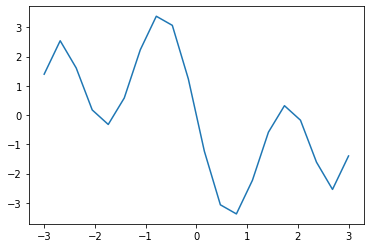

In [116]:
plt.plot(X,y)

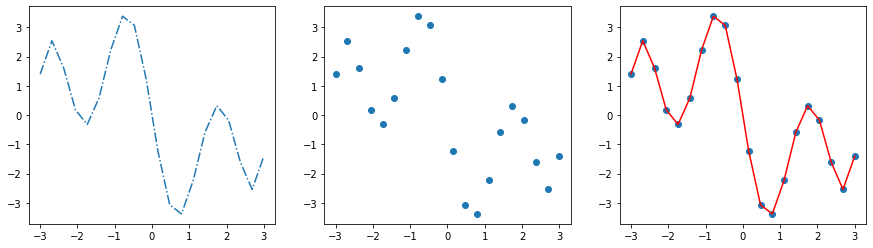

In [117]:
fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=3, sharex='col')
axes[0].plot(X,y, '-.')
axes[1].scatter(X,y)
axes[2].plot(X,y,c='r')
axes[2].scatter(X,y)



## Linear Regression

In [118]:
def linear_simple(x):
    return -2.5*x
Xtrain1 = np.linspace(-1,1,3)
np.random.seed(10) 
# a seed ensures that re-running the random number generator yields the same outcome
# this is helpful for the purpose of sanity checking your implementations
n3 = np.random.normal(0,1.0,3)
ytrain1 = linear_simple(Xtrain1) + n3

x=  [-1.  0.  1.] y=  [ 3.8315865   0.71527897 -4.04540029] noise added=  [ 1.3315865   0.71527897 -1.54540029]


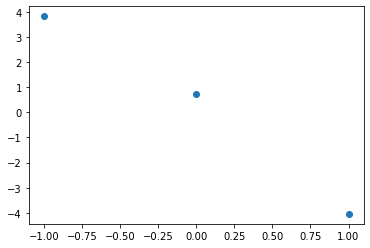

In [119]:
# Check to see what the data looks like 
print("x= ",Xtrain1,"y= ", ytrain1,"noise added= ", n3)
plt.scatter(Xtrain1,ytrain1)

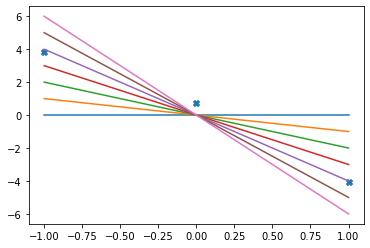

In [120]:
wlist = np.asarray([0.,-1.,-2.,-3.,-4.,-5.,-6.]) # choose 6 values for the slope
X = np.linspace(-1,1,50)
plt.scatter(Xtrain1,ytrain1,marker='X')
for i in range(len(wlist)):
    plt.plot(X,wlist[i]*X)

In [121]:
# print the residuals for each of the six models
# Your turn: compare wrange below with wlist above, check types and values
wrange = np.linspace(-6,0,6) 
for w in wrange:
    print(w*Xtrain1-ytrain1)

[ 2.1684135  -0.71527897 -1.95459971]
[ 0.9684135  -0.71527897 -0.75459971]
[-0.2315865  -0.71527897  0.44540029]
[-1.4315865  -0.71527897  1.64540029]
[-2.6315865  -0.71527897  2.84540029]
[-3.8315865  -0.71527897  4.04540029]


In [122]:
for w in wrange:
    print(np.sum((w*Xtrain1-ytrain1)**2))

9.034101118368394
2.0188694293462808
0.7636377403241693
5.268406051302055
15.533174362279944
31.557942673257834


In [123]:
def mse(w, x, y):
    return np.mean((np.multiply(w,x)-y)**2)
def l1e(w, x, y):
    return np.mean(np.abs(np.multiply(w,x)-y))

print("Mean squared errors:")
for w in wrange:
    print(mse(w, Xtrain1,ytrain1)) 

print("Absolute value of residuals:")    
for w in wrange:
    print(l1e(w, Xtrain1,ytrain1))

Mean squared errors:
3.011367039456131
0.6729564764487602
0.25454591344138977
1.7561353504340182
5.177724787426648
10.519314224419277
Absolute value of residuals:
1.6127640593858732
0.8127640593858728
0.46408859021306403
1.2640885902130639
2.064088590213064
2.8640885902130635


Plotting the loss function for a 1-dimensional unknown weight


In [124]:
# We had defined the mse/rmse function for a single value of the unknown slope w.  
# Here we define it to take an array of w values as input
def ar_mse(w, x, y):  
    return np.array([mse(wi,x,y) for wi in w])
def ar_rmse(w, x, y):  
    return np.array([rmse(wi,x,y) for wi in w])
def ar_l1e(w, x, y):  
    return np.array([l1e(wi,x,y) for wi in w])

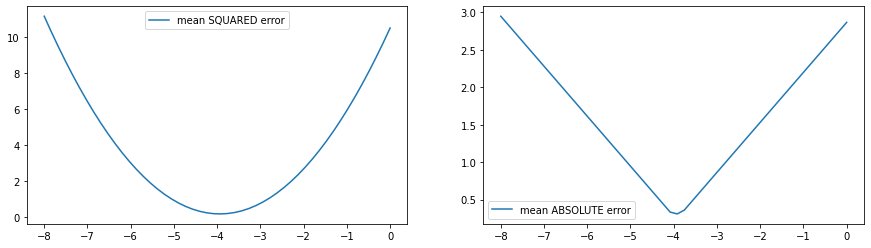

In [125]:
wlims = np.linspace(-8,0,50) # Generate 50 slope values for the straight line models
fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=2)
ax[0].plot(wlims,ar_mse(wlims,Xtrain1, ytrain1), label='mean SQUARED error')
ax[0].legend()
ax[1].plot(wlims,ar_l1e(wlims,Xtrain1, ytrain1), label='mean ABSOLUTE error')
ax[1].legend()

In [126]:
wbest, least_error = (wlims[np.argmin(ar_mse(wlims,Xtrain1, ytrain1))],np.min(ar_mse(wlims,Xtrain1, ytrain1)))
print(wbest, least_error) # the best-fit value and the corresponding error 

-3.9183673469387754 0.1784307650181058


## My Turn;
should the wbest and least_error change if rmse is evaluated instead. 


In [127]:
def rmse(w, x, y):
    return (np.mean((np.multiply(w,x)-y)**2))**0.5

def ar_rmse(w, x, y):
    return np.array([rmse(wi,x,y) for wi in w])

In [128]:
wbest, least_error = (wlims[np.argmin(ar_rmse(wlims,Xtrain1, ytrain1))],np.min(ar_rmse(wlims,Xtrain1, ytrain1)))
print(wbest, least_error) # the best-fit value and the corresponding error 

-3.9183673469387754 0.4224106592145916


the best weight has not changed but the least_error has as it has used an RMSE loss function not a MSE function. If we square the least_error in this case it should be the same as the previous regression. 

In [129]:
least_error**2


0.17843076501810584

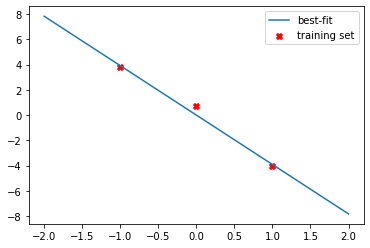

In [130]:
X = np.linspace(-2,2,50)
plt.plot(X,wbest*X, label='best-fit')
plt.scatter(Xtrain1,ytrain1,c='r',marker='X', label='training set')
plt.legend()

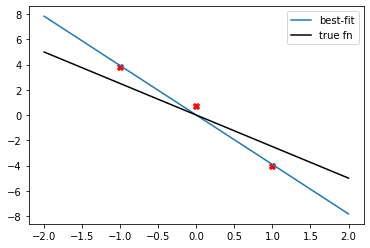

In [131]:
X = np.linspace(-2,2,50)
plt.plot(X,wbest*X, label='best-fit')  # Best fit line
plt.plot(X,-2.5*X,  c='k', label='true fn') # Noise-free line from which data was generated
plt.scatter(Xtrain1,ytrain1,c='r',marker='X')# data points
plt.legend()

In [132]:
npts = 10
Xtrain2 = np.linspace(-1,1,npts)
noise = np.random.normal(0,1.0,npts)
ytrain2 = linear_simple(Xtrain2) + noise  # generate some more points from the same function

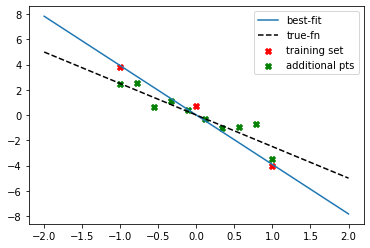

In [133]:
X = np.linspace(-2,2,10)
plt.plot(X,wbest*X, label='best-fit')
plt.plot(X,-2.5*X, '--', c='k', label='true-fn')
plt.scatter(Xtrain1,ytrain1,c='r',marker='X', label='training set')
plt.scatter(Xtrain2,ytrain2,c='g',marker='X', label='additional pts')
plt.legend()

## Your Turn:
with the additional 10 points. Find the best fit again. 

Step 1: define the loss function (again)

In [134]:
def mse(w, x, y):
    return np.mean((np.multiply(w,x)-y)**2)

Step 2: create a function to evalate the loss for a number of different weights

In [135]:

def ar_rmse(w, x, y):
    return np.array([rmse(wi,x,y) for wi in w])

Step 3: find the weight value that produces the least loss

In [136]:
wbest, least_error = (wlims[np.argmin(ar_rmse(wlims,Xtrain2, ytrain2))],np.min(ar_rmse(wlims,Xtrain1, ytrain1)))
print(wbest, least_error) # the best-fit value and the corresponding error 

-2.4489795918367347 0.4224106592145916


Step 4: lets plot it again to see

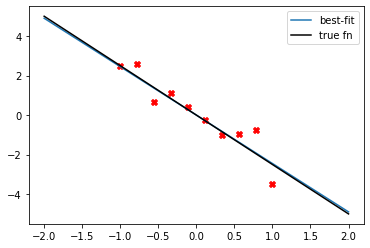

In [137]:
X = np.linspace(-2,2,50)
plt.plot(X,wbest*X, label='best-fit')  # Best fit line
plt.plot(X,-2.5*X,  c='k', label='true fn') # Noise-free line from which data was generated
plt.scatter(Xtrain2,ytrain2,c='r',marker='X')# data points
plt.legend()

***Much Better***

## Gradient Descent

In [163]:
npts = 20
Xtrain3 = np.linspace(-1,1,npts)
noise = np.random.normal(0,1.0,npts)
ytrain3 = linear_simple(Xtrain3) + noise

Text(0.5, 1.0, 'Mean square loss function')

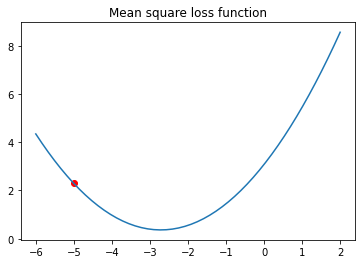

In [164]:
wlims = np.linspace(-6,2,50) # Generate 50 slope values for the straight line models
plt.plot(wlims,ar_mse(wlims, Xtrain3, ytrain3))
plt.scatter([-5.],ar_mse([-5.],Xtrain3, ytrain3),c='r')
plt.title("Mean square loss function")

In [165]:
def loss_slope_w1(w1, Xtrain, ytrain):
    return (2/len(Xtrain))*(np.dot(w1*Xtrain - ytrain, Xtrain))

In [166]:
print("slope of loss fn = ",loss_slope_w1( -5.0, Xtrain3, ytrain3), \
      ", mse loss fn = ", mse(-5., Xtrain3, ytrain3))

slope of loss fn =  -1.6838557575751008 , mse loss fn =  2.2904293681543764


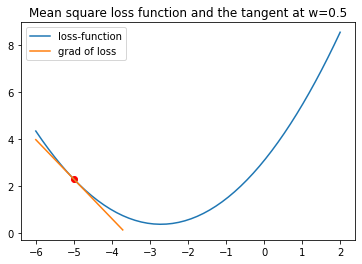

In [167]:
wlims = np.linspace(-6,2,50) # Generate 50 slope values for the straight line models
plt.plot(wlims,ar_mse(wlims, Xtrain3, ytrain3), label='loss-function')
plt.scatter([-5.],ar_mse([-5.],Xtrain3, ytrain3),c='r')
gw = loss_slope_w1(-5.0, Xtrain3, ytrain3)
loss = mse(-5., Xtrain3, ytrain3)
plt.plot(wlims[:15],gw*(wlims[:15]+5.) + loss, label='grad of loss') # plotting the slope using the first few values of w (prettifying )
plt.title('Mean square loss function and the tangent at w=0.5')
plt.legend()

In [168]:
def gradientdescent0(initialweight, X, y, rate, numiter):
    whistory = []
    msehistory = [] 
    w = initialweight
    for i in range(numiter): 
        loss = mse(w, X, y)
        whistory.append(w)
        msehistory.append(loss)
        grad = loss_slope_w1(w, X, y)
        w = w - rate*grad  # go a certain distance opposite to the slope (downward) 
    return w, np.asarray(whistory), np.asarray(msehistory)

In [169]:
print('numiter = 1:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 1))
print('numiter = 2:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 2))
print('numiter = 3:\n', gradientdescent0(-5., Xtrain3, ytrain3, .2, 3))

numiter = 1:
 (-4.66322884848498, array([-5.]), array([2.29042937]))
numiter = 2:
 (-4.376087129824805, array([-5.        , -4.66322885]), array([2.29042937, 1.76513973]))
numiter = 3:
 (-4.131261032861919, array([-5.        , -4.66322885, -4.37608713]), array([2.29042937, 1.76513973, 1.38326435]))


## My Turn 
plotting the mse against iteration

In [173]:
w, whistory, mse_history = gradientdescent0(-5, Xtrain3, ytrain3, .2, 50)
w, whistory, mse_history2 = gradientdescent0(-5, Xtrain3, ytrain3, .1, 50)
w, whistory, mse_history3 = gradientdescent0(-5, Xtrain3, ytrain3, .3, 50)



In [174]:
shape = mse_history.shape

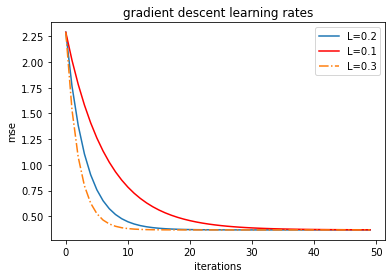

In [180]:
plt.plot(range(shape[0]), mse_history, label='L=0.2')
plt.plot(range(shape[0]), mse_history2, c='r', label='L=0.1')
plt.plot(range(shape[0]), mse_history3, '-.', label='L=0.3')
        
plt.xlabel('iterations')
plt.ylabel('mse')
plt.title('gradient descent learning rates')
plt.legend()

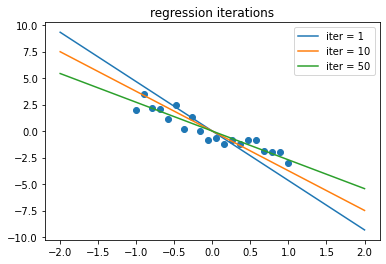

In [186]:
w1, whistory, mse_history = gradientdescent0(-5, Xtrain3, ytrain3, .2, 1)
w2, whistory, mse_history2 = gradientdescent0(-5, Xtrain3, ytrain3, .2, 5)
w3, whistory, mse_history3 = gradientdescent0(-5, Xtrain3, ytrain3, .2, 50)

X = np.linspace(-2,2,50)
plt.plot(X,w1*X, label='iter = 1') 
plt.plot(X, w2*X, label='iter = 10')
plt.plot(X, w3*X, label='iter = 50')
plt.scatter(Xtrain3, ytrain3) 
plt.title('regression iterations')

plt.legend()

In [187]:
def linear_fit(X,y):
    num = (X*y).mean() - (X.mean()*y.mean())
    den = (X**2).mean() - (X.mean())**2
    w1 = num/den
    w0 = y.mean() - w1*X.mean()
    return w0, w1

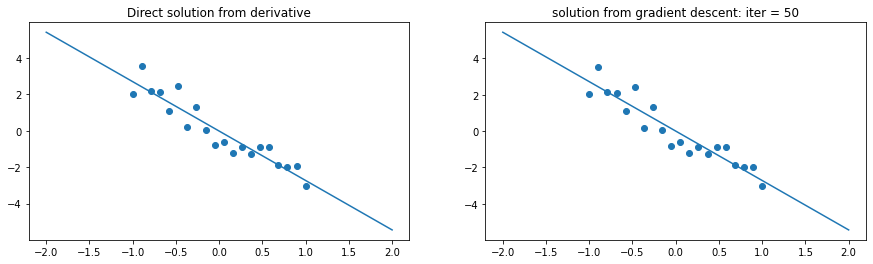

In [193]:
w0, w1 = linear_fit(Xtrain3, ytrain3)

fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=2, sharex='col')
axes[0].title.set_text('Direct solution from derivative')
axes[0].scatter(Xtrain3, ytrain3)
axes[0].plot(X,w1*X + w0)

axes[1].scatter(Xtrain3, ytrain3)
axes[1].plot(X, w3*X)
axes[1].title.set_text('solution from gradient descent: iter = 50')



***They are identical! :)***

## Olympic dataset

In [287]:

olympics100m = np.asarray([1900,11,
1904,11,
1906,11.2,
1908,10.8,
1912,10.8,
1920,10.8,
1924,10.6,
1928,10.8,
1932,10.3,
1936,10.3,
1948,10.3,
1952,10.4,
1956,10.5,
1960,10.2,
1964,10,
1968,9.95,
1972,10.14,
1976,10.06,
1980,10.25,
1984,9.99,
1988,9.92,
1992,9.96,
1996,9.84,
2000,9.87,
2004,9.85,
2008,9.69,
2012,9.63,
2016,9.81]);

# women's 100m sprint times
olympics100f=np.asarray([
1948, 11.90,
1952, 11.50,
1956, 11.50,
1960, 11.00,
1964, 11.40,
1968, 11.08,
1972, 11.07,
1976, 11.08,
1980, 11.06,
1984, 10.97,
1988, 10.54,
1992, 10.82,
1996, 10.94,
2000, 10.75,
2004, 10.93,
2008, 10.78,
2012, 10.75,
2016, 10.71])

In [311]:

def get_training_data():
    size_m = olympics100m.shape
    size_f = olympics100f.shape

    Xtrainm = np.zeros([int(size_m[0]/2)])
    ytrainm = np.zeros([int(size_m[0]/2)])

    Xtrainf = np.zeros([int(size_f[0]/2)])
    ytrainf = np.zeros([int(size_f[0]/2)])

    even_idx = 1
    odd_idx = 0;
    for i in range(int(size_m[0])):

        if i==0:
            Xtrainm[i] = olympics100m[i]
        elif i%2==0:
            Xtrainm[even_idx] = olympics100m[i]
            even_idx = even_idx + 1
        else:
            ytrainm[odd_idx] = olympics100m[i]
            odd_idx = odd_idx + 1

    even_idx = 1
    odd_idx = 0;

    for i in range(int(size_f[0])):
        if i==0:
            Xtrainf[i] = olympics100f[i]
        elif i%2==0:
            Xtrainf[even_idx] = olympics100f[i]
            even_idx = even_idx + 1
        else:

            ytrainf[odd_idx] = olympics100f[i]
            odd_idx = odd_idx + 1
    return Xtrainm, ytrainm, Xtrainf, ytrainf

In [312]:
Xtrainm, ytrainm, Xtrainf, ytrainf = get_training_data()

Text(0, 0.5, '100m time')

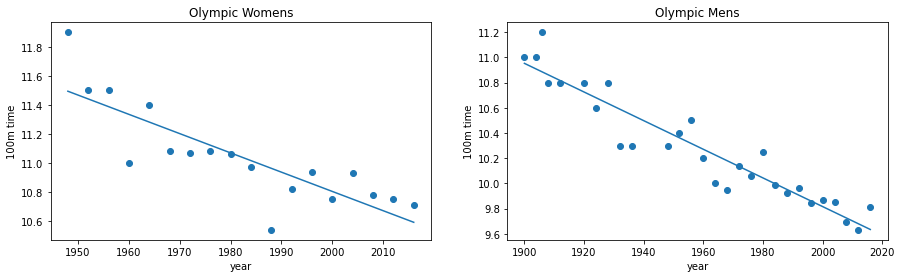

In [331]:
w0m, w1m = linear_fit(Xtrainm, ytrainm)
w0f, w1f = linear_fit(Xtrainf, ytrainf)

fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=2, sharex='col')

axes[0].scatter(Xtrainf, ytrainf)
axes[0].plot(Xtrainf, w0f + w1f*Xtrainf)
axes[0].title.set_text('Olympic Womens')
axes[0].set_xlabel('year')
axes[0].set_ylabel('100m time')

axes[1].scatter(Xtrainm, ytrainm)
axes[1].plot(Xtrainm, w0m + w1m * Xtrainm)
axes[1].title.set_text('Olympic Mens')
axes[1].set_xlabel('year')
axes[1].set_ylabel('100m time')


In [332]:
import pandas as pd

In [337]:
data = {'w0': [w0m, w0f], 'w1': [w1m, w1f]}
df = pd.DataFrame(data)
df

,w0,w1
0,32.562694,-0.011374
1,37.326821,-0.013261


The parmeter values are slightly different but very similar